### Importation des bibliotheques

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
from sklearn.cluster import KMeans

### Fonctions necessaires

In [44]:
def norma(colors):
    colors_bis = []
    for color in colors:
        cc = []
        for v in color:
            cc.append(v/255)
        colors_bis.append(cc)
    return colors_bis


def showPoints(pixels , axis1,axis2):
    if(axis1 < 0 or axis1 > 2 ) and (axis2 < 0 or axis2 > 2):
        return
    plt.scatter(pixels[:,axis1],pixels[:,axis2])
    plt.show()
    
    
def Resize(image,new_width,new_height):
    
    width,height = image.size
    
    resized_image = Image.new(image.mode, (new_width, new_height), 'white')

    # un facteur < 1 --> retricement
    # un facteur > 1 --> etirement
    facteur_x = new_width/width
    facteur_y = new_height/height

    for y in range(new_height):
        for x in range(new_width):
            newX = int(np.round(x/facteur_x))
            newY = int(np.round(y/facteur_y))
            pixel = image.getpixel((newX,newY))
            resized_image.putpixel((x, y),  pixel)
            
    return resized_image


def PickleColorsFromImage(image,nbColors):
    image = Image.open(image)
    if(image.size[0] > 500 or image.size[1] > 500):
        image = Resize(image,500,500)
    pixels = np.array(image.getdata())
    kmeans = KMeans(n_clusters=nbColors).fit(pixels)
    return pixels,kmeans.cluster_centers_  


### Processus

In [25]:
IMG = "data/img4.jpg"

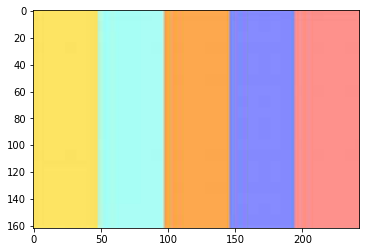

In [53]:
img = mpimg.imread(IMG)
plt.imshow(img)

In [45]:
pixels , colors = PickleColorsFromImage(IMG,5)

Affichage du nuage de points selon deux axes choisis en parametre

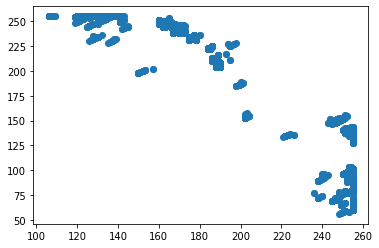

In [49]:
showPoints(pixels,0,2)

In [47]:
colors

array([[169.86230789, 253.07016881, 241.77790375],
       [251.96690307, 167.73128448,  77.26136065],
       [132.2496142 , 138.19714506, 251.74305556],
       [250.69256839, 146.17283951, 141.29823287],
       [252.54295267, 227.56918724,  98.5468107 ]])

Affichage des couleurs generées par l'execution de l'algorithme 

([<matplotlib.patches.Wedge at 0x1420cb71ee0>,
 [Text(0.8899186877588753, 0.6465637858537406, ''),
  Text(-0.3399187231970732, 1.046162158377023, ''),
  Text(-1.0999999999999988, -5.149471622296949e-08, ''),
  Text(-0.33991862524830174, -1.0461621902025062, ''),
  Text(0.8899187482945414, -0.6465637025335375, '')])

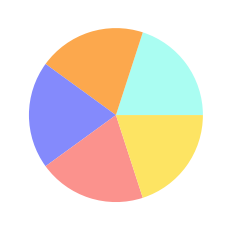

In [51]:
X = [10 for i in range(len(colors))]
plt.pie(X,colors=norma(colors))